# Baseball Case Study

Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

In [1]:
#Importing the required library for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\admin1\Desktop\baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#view my first 5 records
df.head()               

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
#converting column names for better understanding.
column_list=["Wins","Runs","At Bats","Hits","Doubles","Triples","Homeruns","Walks","Strikeouts","Stolen Bases","Runs Allowed",'Earned Runs',"Earned Run Average (ERA)", 'Complete Games', 'Shutouts', 'Saves',
       'Errors'] 

In [6]:
#replaced column name with new name from column_list
df.set_axis(column_list,axis=1,inplace=True) 

In [7]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'Saves',
       'Errors'],
      dtype='object')

In [8]:
# describing data
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In some of the columns std is  high where data  is spreaded too much and range is high where outliers may be present

In [9]:
#Checking null_values and data_type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

# EDA

In [10]:
#Checking for Null values present in my dataframe
df.isnull()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

<AxesSubplot:>

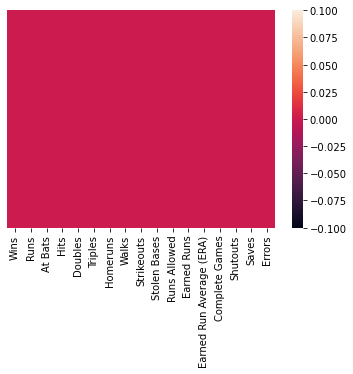

In [12]:
#visualising null values in heatmap
sns.heatmap(df.isnull(),yticklabels=False)

No Null Values present in our DataFrame

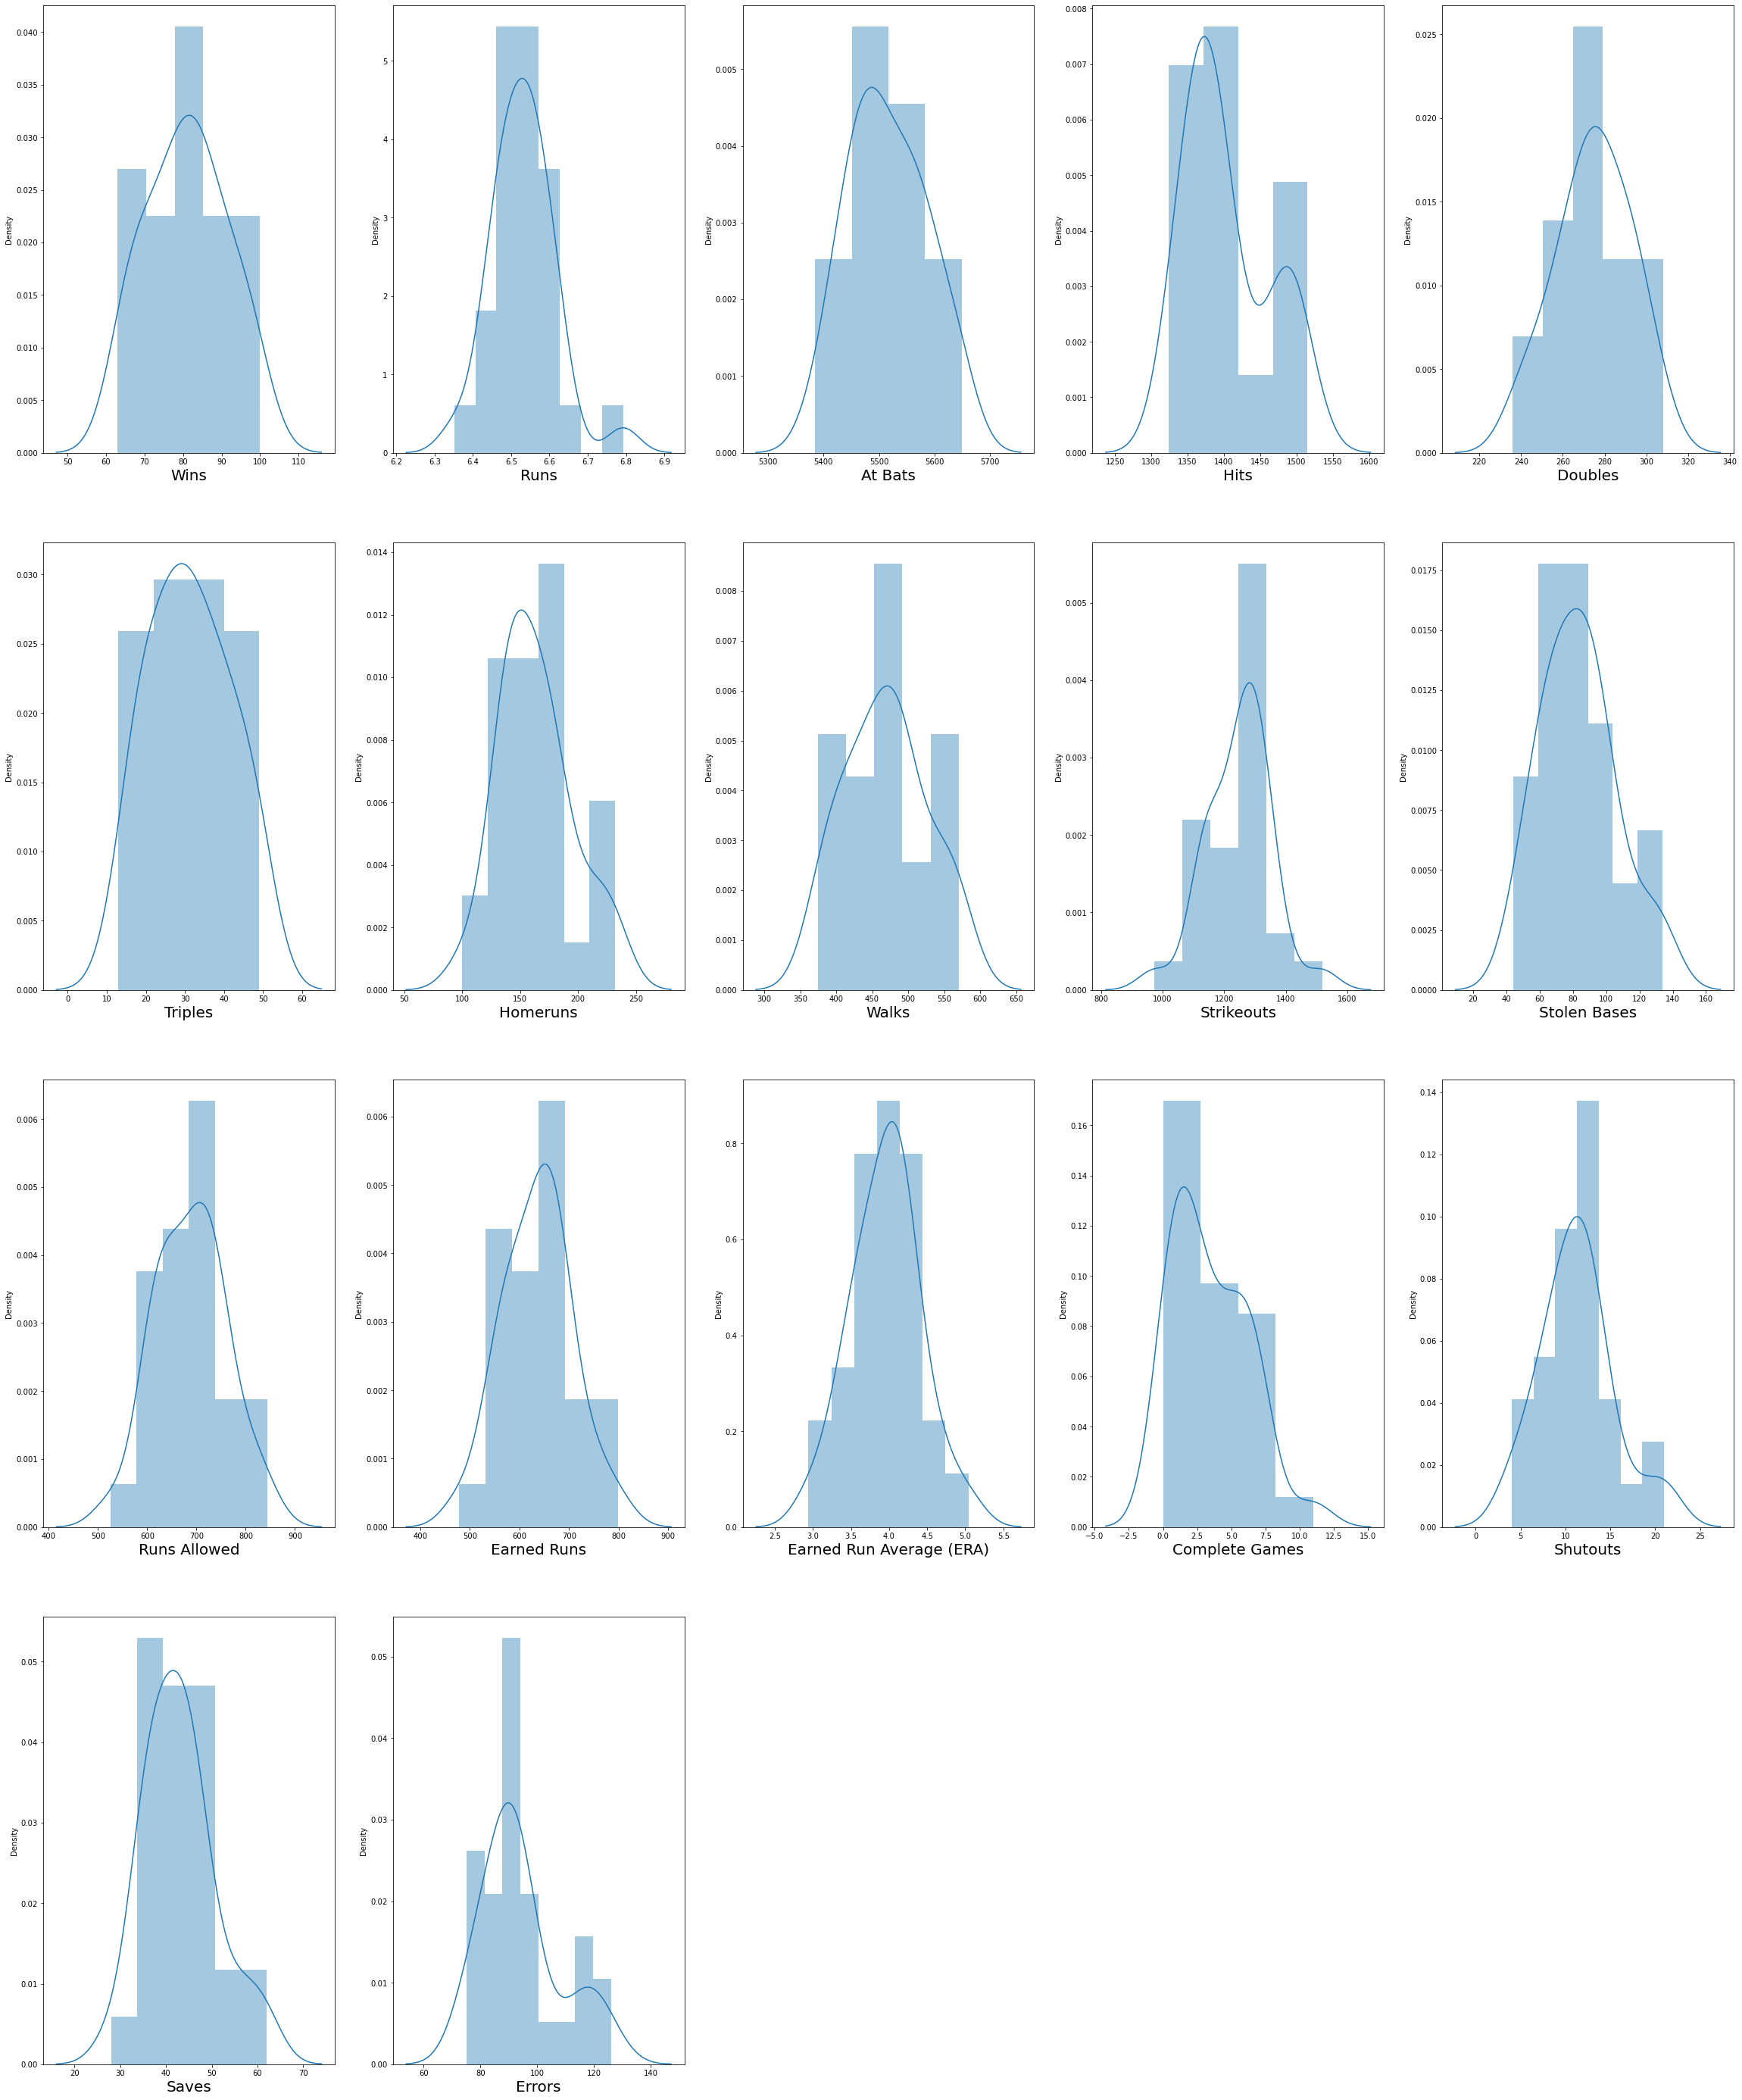

In [24]:
# ploting Normal Distribution curve

plt.figure(figsize=(40,50),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=17:
            ax=plt.subplot(4,5,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [20]:
# checking skewness
df.skew()

Wins                        0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Complete Games              0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

There is skewness present in runs column

In [21]:
# Reducing skewness
from scipy.stats import boxcox
df['Runs']=boxcox(df['Runs'],0)

In [22]:
df.skew()

Wins                        0.047089
Runs                        0.744196
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Complete Games              0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

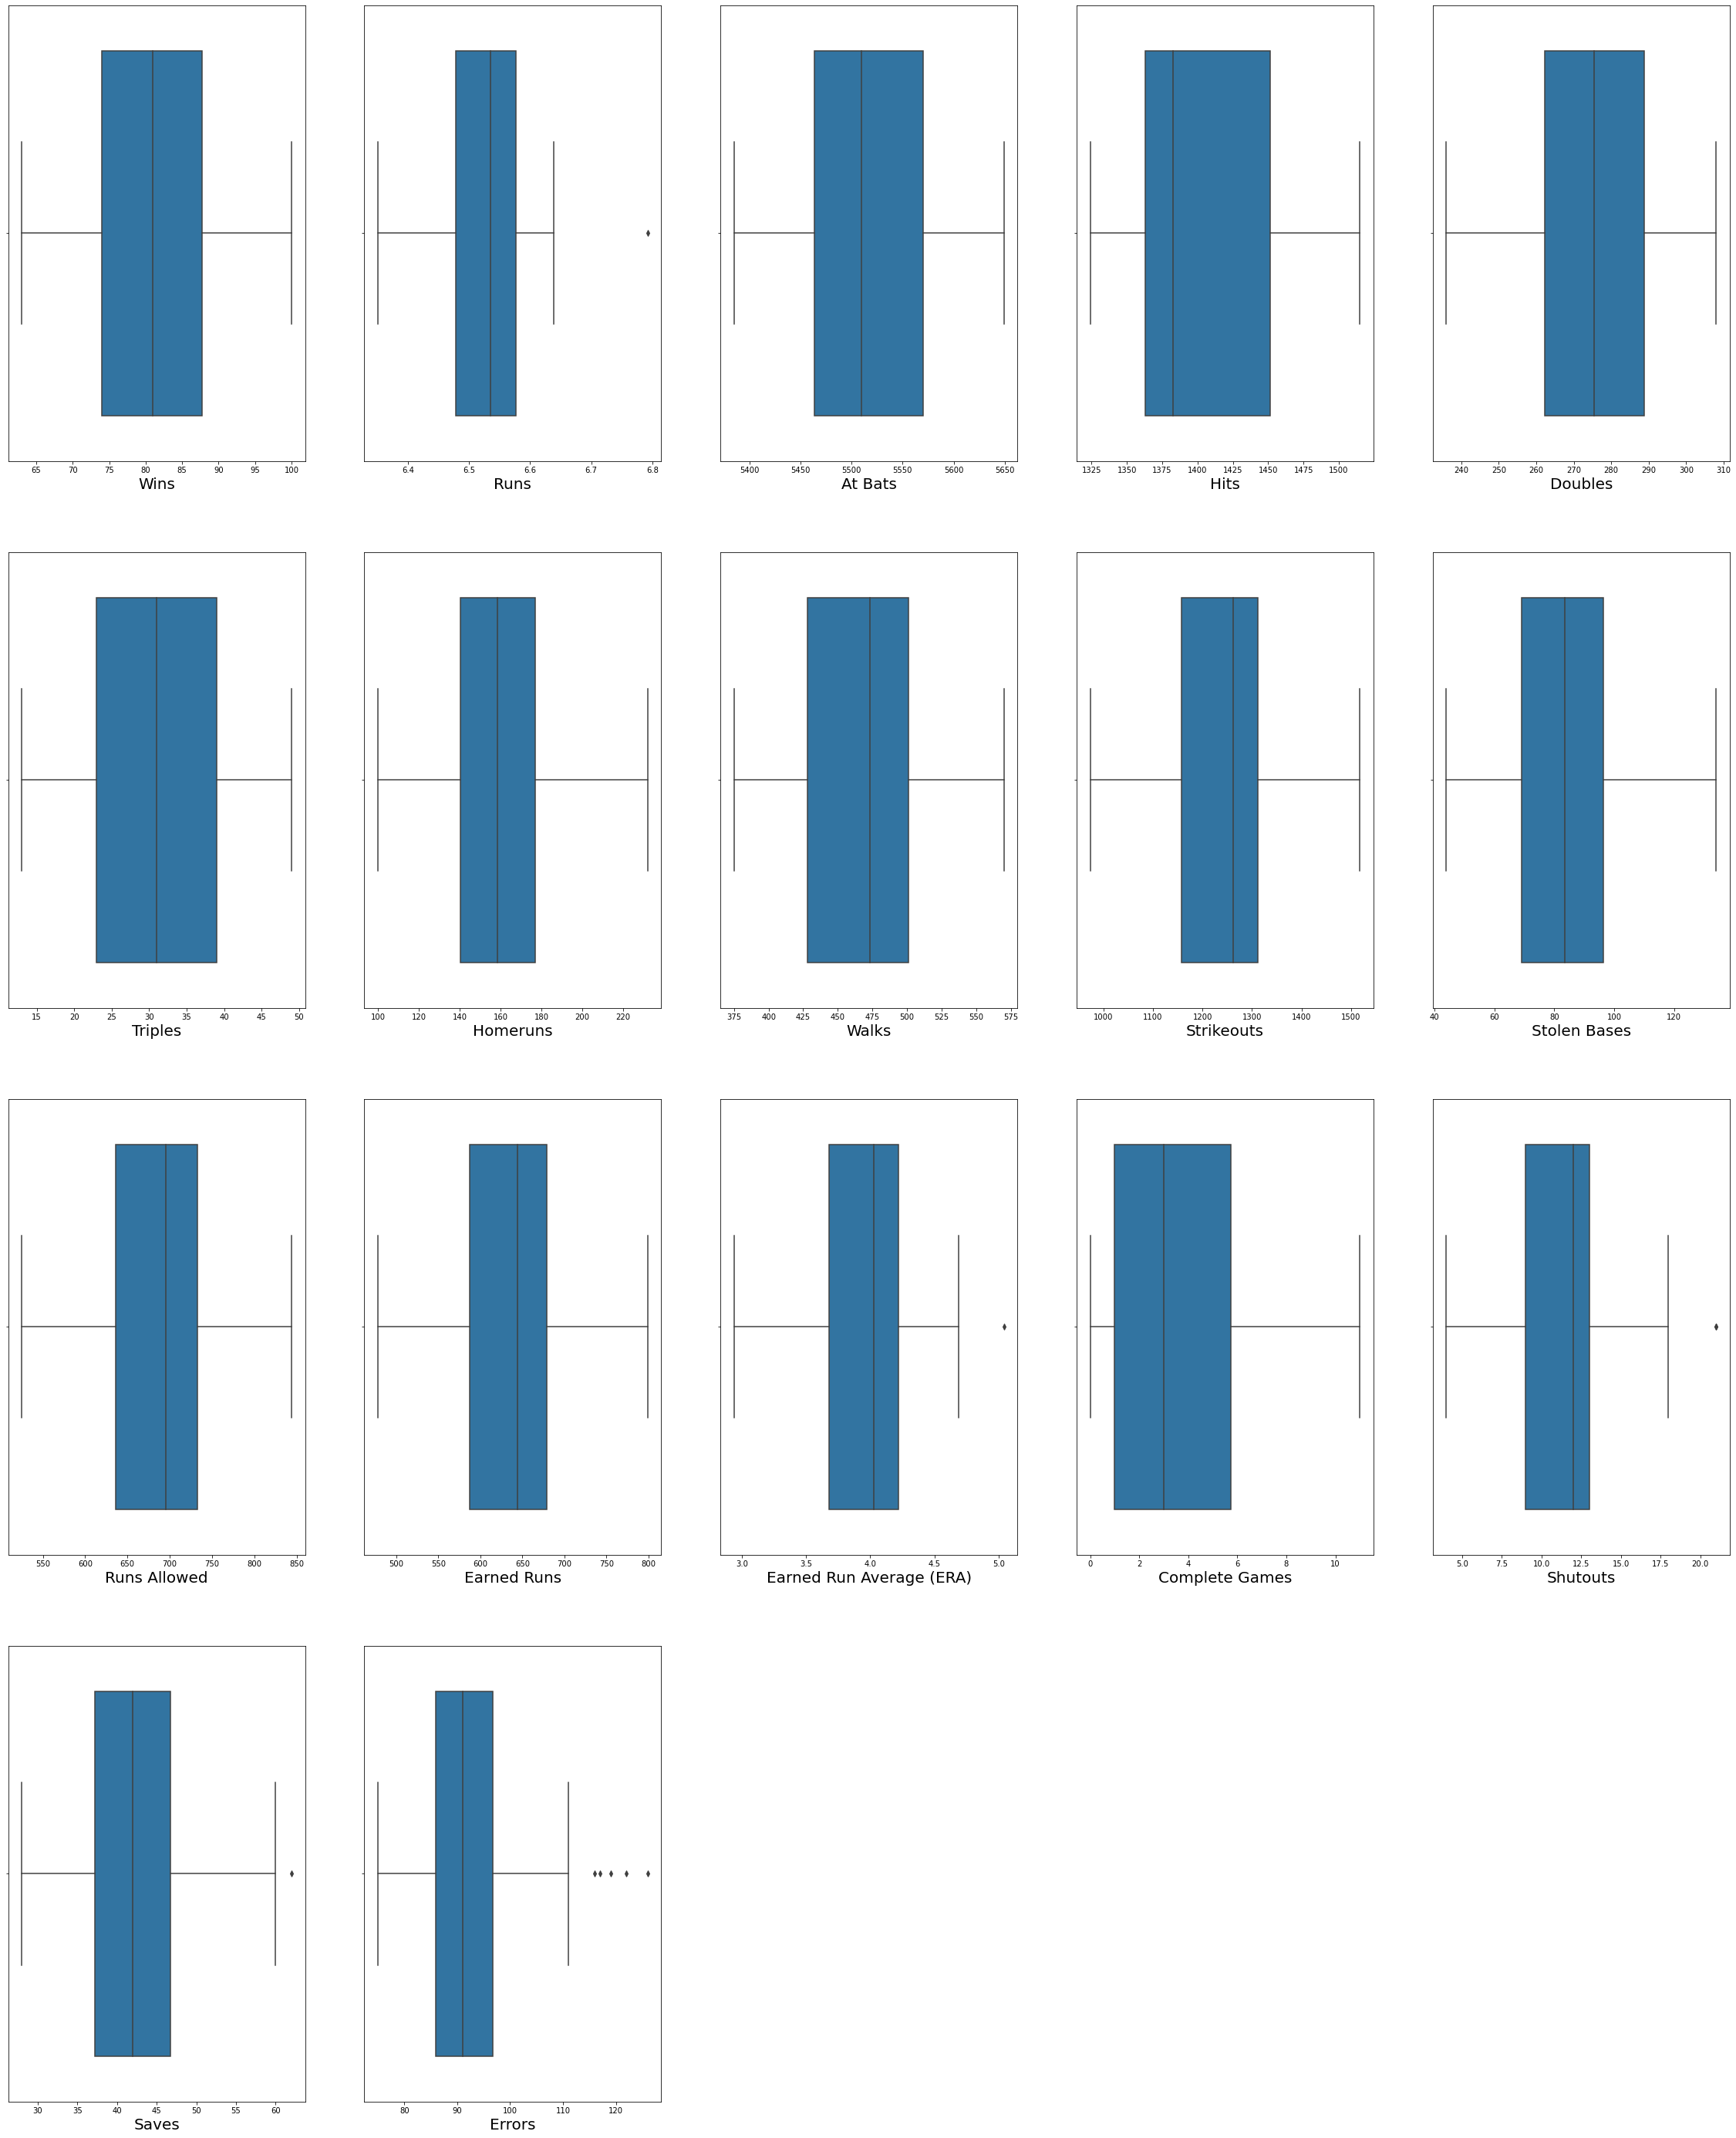

In [25]:
# checking outliers by using boxplot

plt.figure(figsize=(40,50),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=17:
            ax=plt.subplot(4,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [26]:
#checking for Z score to remove outliers
from scipy import stats

z=np.abs(stats.zscore(df))
print(z)

[[1.3654086  0.66538462 0.84773126 1.66368512 1.42017307 1.04119304
  0.7872986  1.53490242 2.69762957 0.91388329 0.66623393 0.50511008
  0.50695519 0.5398062  0.81462859 1.67160651 0.46146963]
 [0.1978383  0.17962404 0.71109353 0.97068076 0.12740339 1.23580856
  0.24396668 0.5365919  0.15487844 0.60182558 0.16597077 0.24892985
  0.25459752 0.5398062  0.1728     0.24987932 0.60719689]
 [0.00324325 0.30766209 1.1152333  0.15189137 1.58879521 0.22380785
  0.7233772  1.13914361 0.89398189 0.11144918 0.68033909 0.75162313
  0.64134684 2.77264091 0.32091429 0.65485616 1.11724227]
 [0.48324437 1.20480139 0.24152162 0.40108814 0.82812203 0.41842337
  0.8831807  1.16053598 0.16860185 0.69098493 0.18007593 0.10392217
  0.05301004 1.3004422  0.56777144 0.78410408 0.48575751]
 [0.67783942 0.05513009 1.28073815 1.98408098 0.80189192 1.72234737
  0.40377019 0.25136033 0.10586628 0.02228984 1.61880269 1.59750126
  1.53131824 1.3004422  0.1728     1.04259994 0.60719689]
 [1.17081355 3.22158785 0.1048

In [27]:
index=(np.where(z>4)[0])

In [28]:
df=df.drop(df.index[index])

Zscore did not removed any records

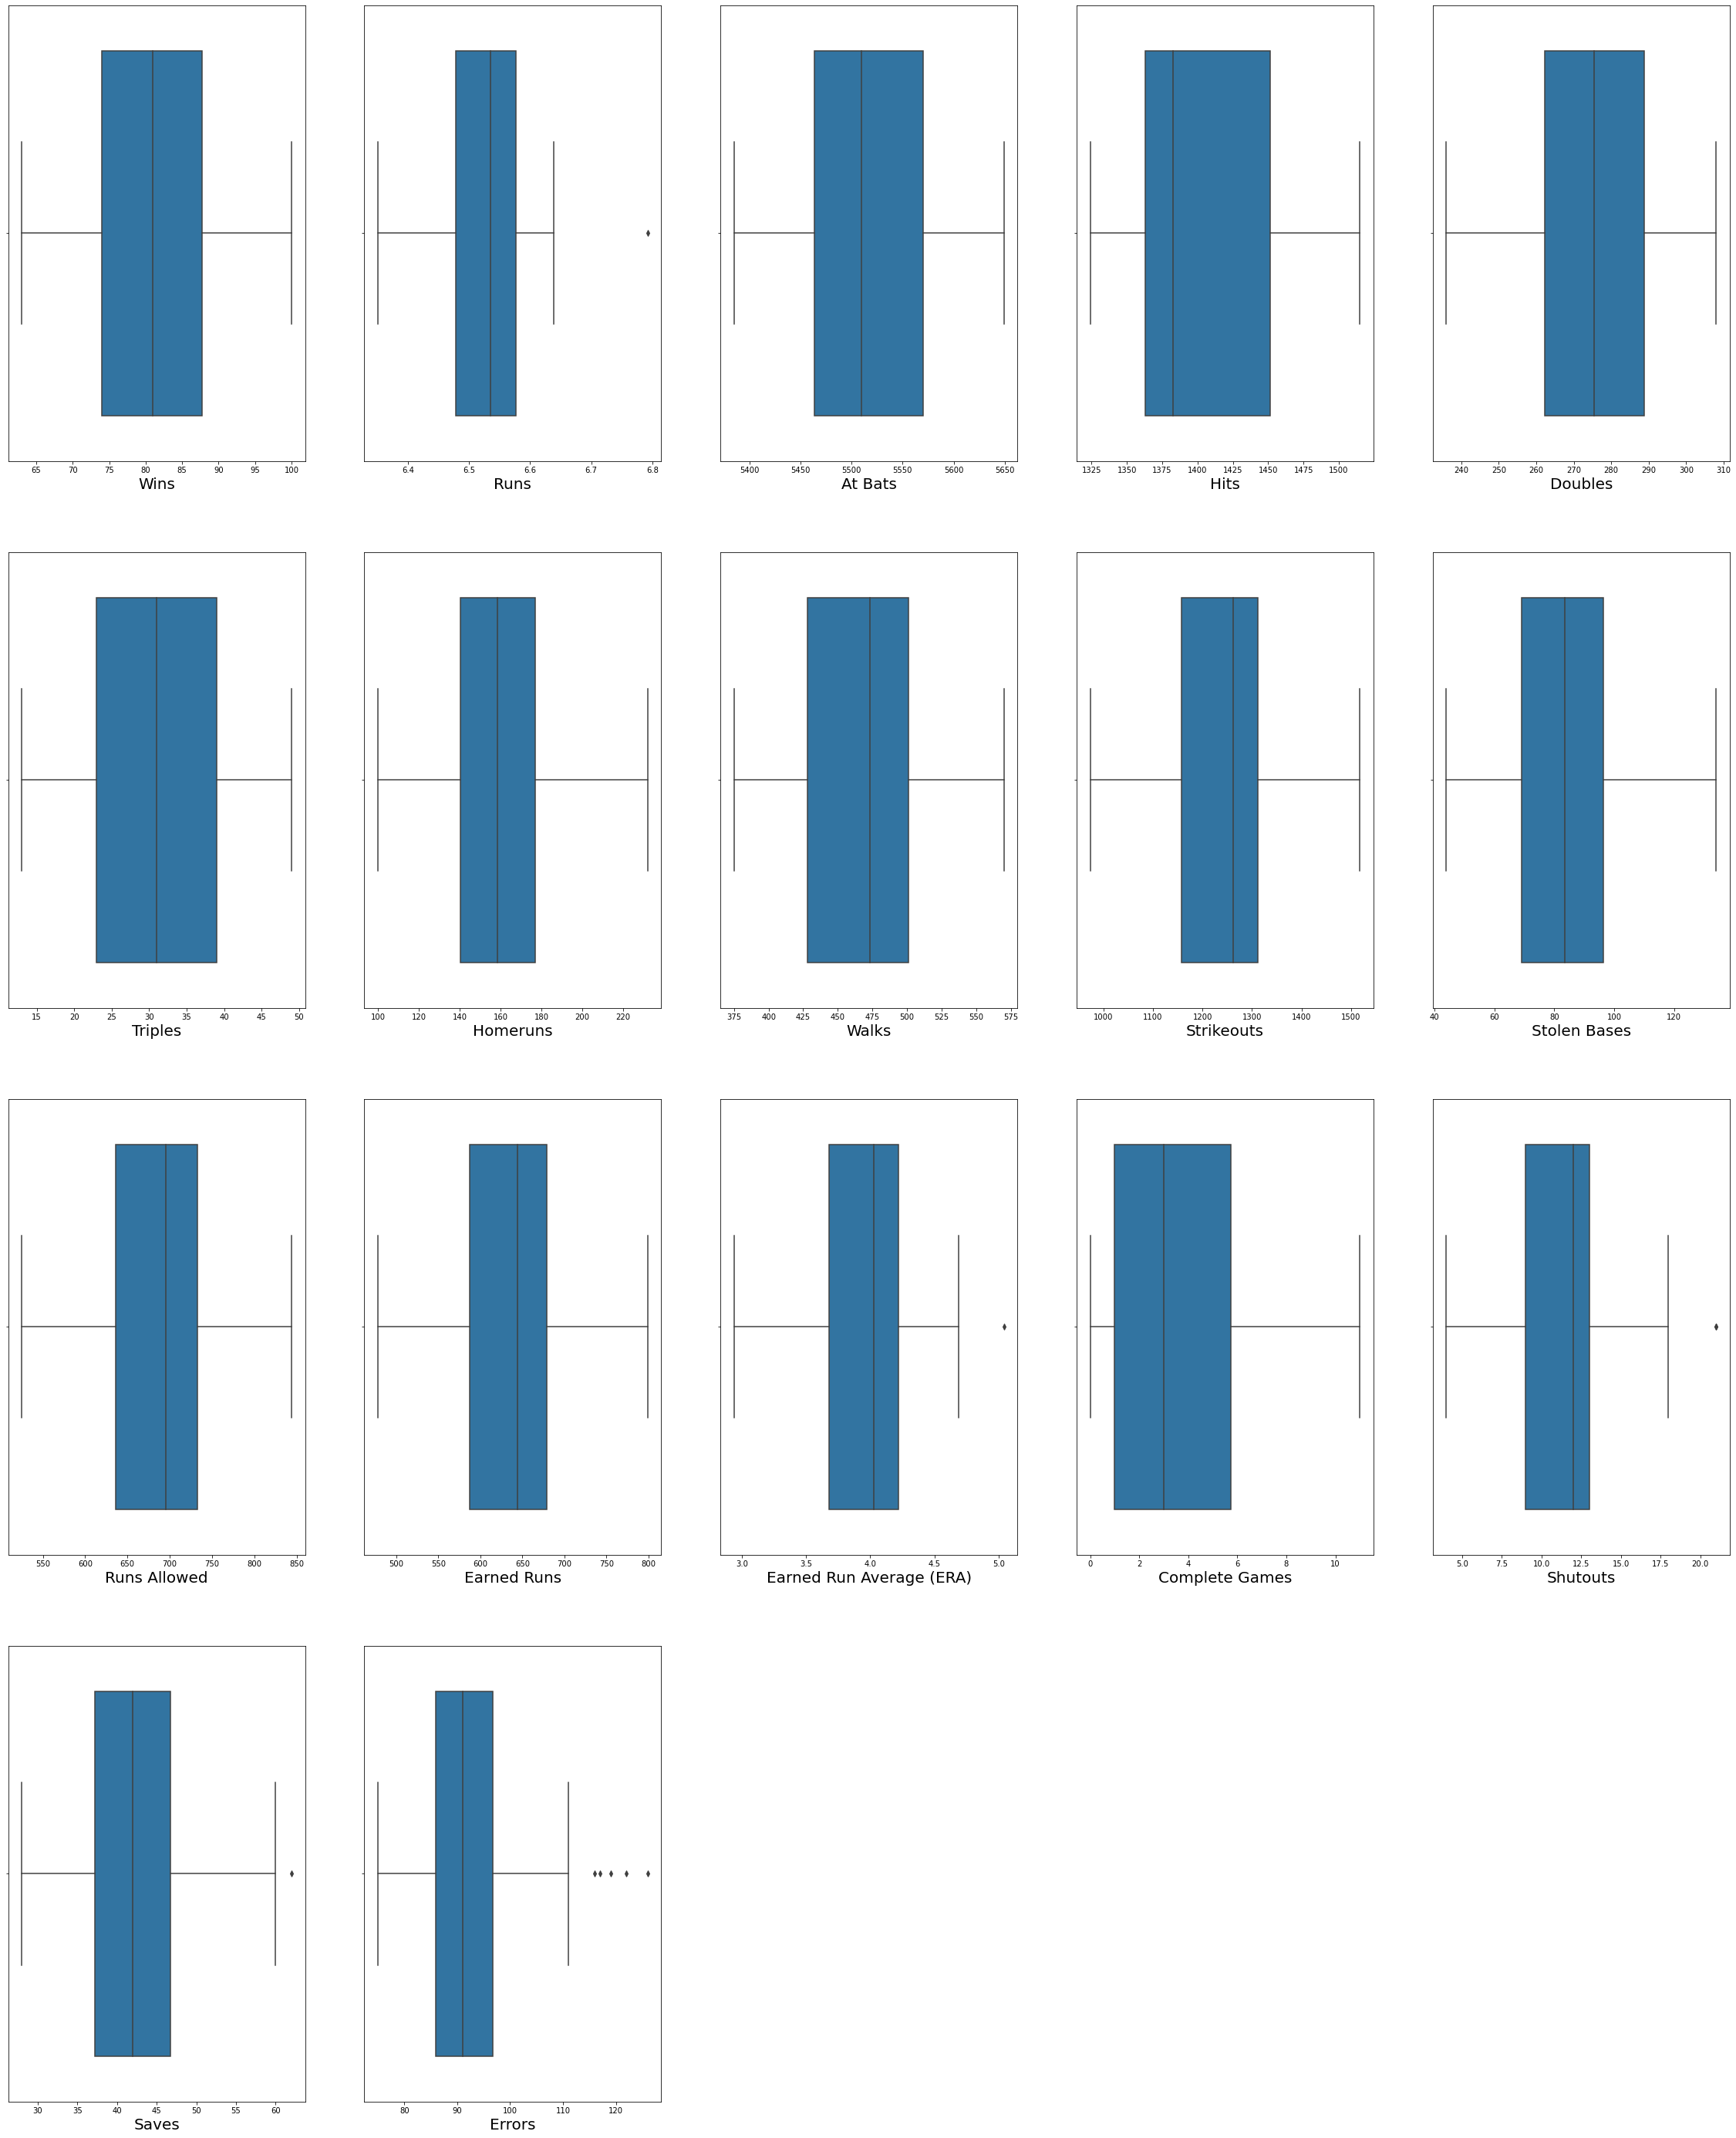

In [29]:
#plots post outlier removal
plt.figure(figsize=(40,50),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=17:
            ax=plt.subplot(4,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

In [30]:
#checking correlation 
corr=df.corr()
corr

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.442824,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.442824,1.000000,0.338160,0.482974,0.566762,-0.045118,0.676426,0.395825,-0.030640,0.081067,-0.051796,-0.049386,-0.058939,0.226331,-0.089098,-0.080262,-0.017378
At Bats,-0.087947,0.338160,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482974,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.566762,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.045118,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.676426,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.395825,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.030640,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081067,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<function matplotlib.pyplot.show(close=None, block=None)>

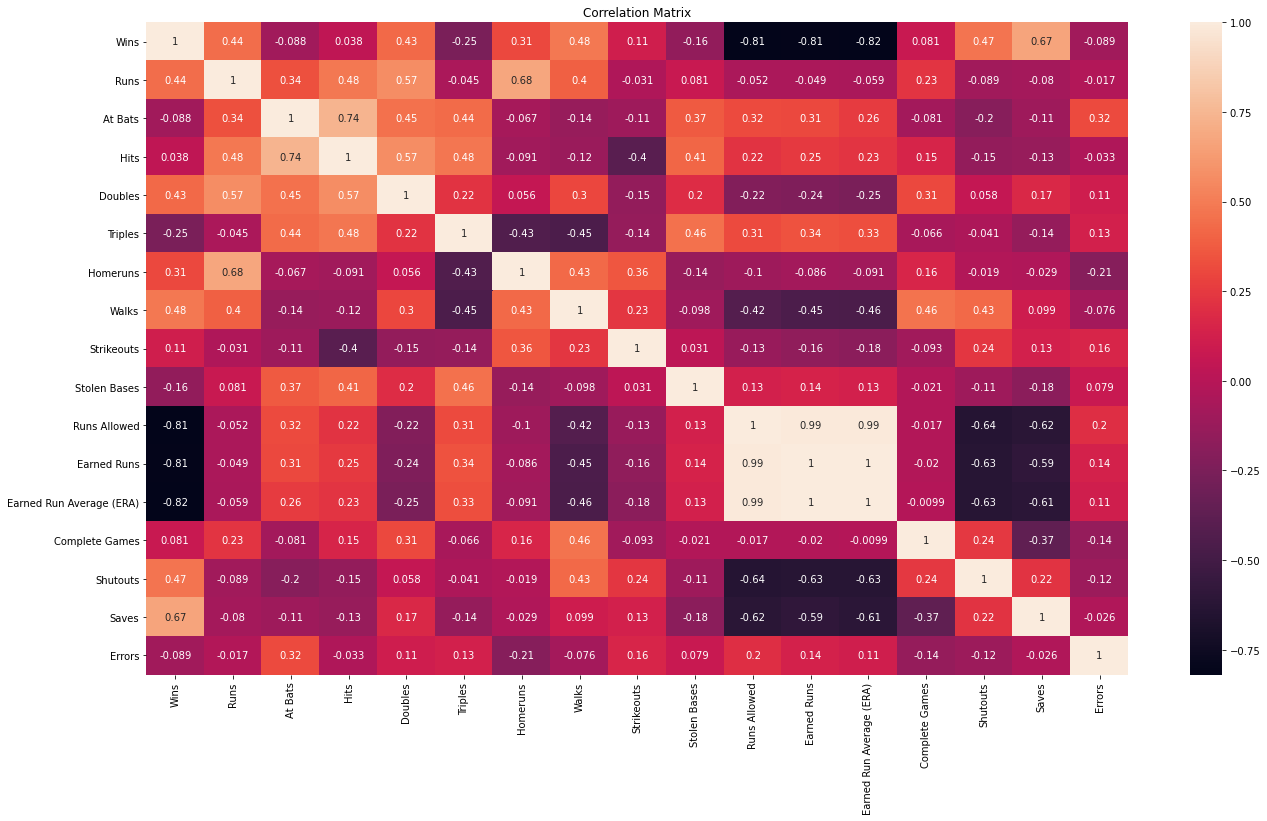

In [32]:
#Visualising heatmap for corr 
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show

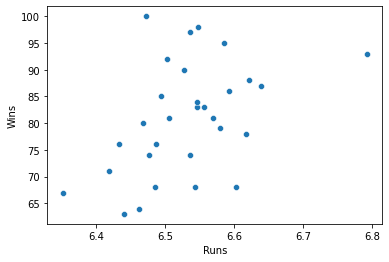

In [33]:
# ploting scatter plot
sns.scatterplot(x='Runs',y='Wins',data=df)
plt.show()

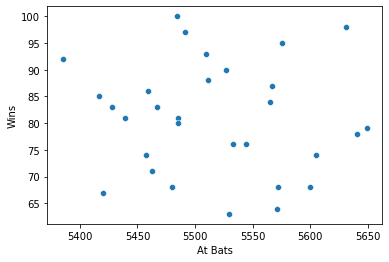

In [34]:
sns.scatterplot(x='At Bats',y='Wins',data=df)
plt.show()

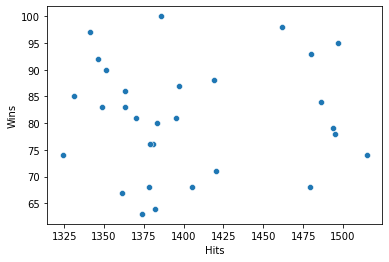

In [35]:
sns.scatterplot(x='Hits',y='Wins',data=df)
plt.show()

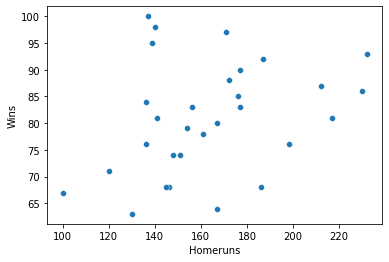

In [36]:
sns.scatterplot(x='Homeruns',y='Wins',data=df)
plt.show()

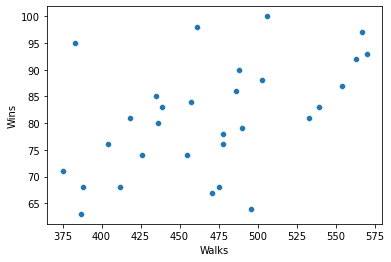

In [37]:
sns.scatterplot(x='Walks',y='Wins',data=df)
plt.show()

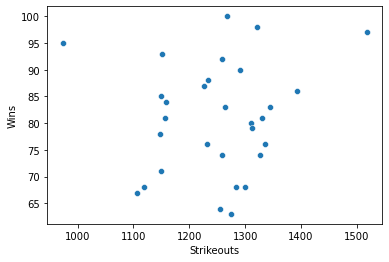

In [38]:
sns.scatterplot(x='Strikeouts',y='Wins',data=df)
plt.show()

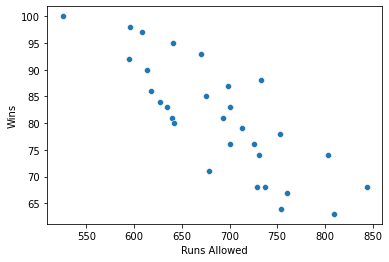

In [39]:
sns.scatterplot(x='Runs Allowed',y='Wins',data=df)
plt.show()

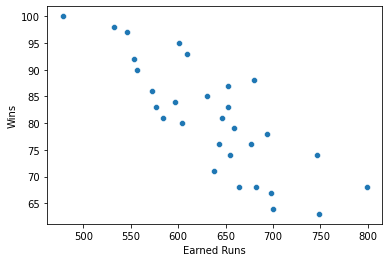

In [40]:
sns.scatterplot(x='Earned Runs',y='Wins',data=df)
plt.show()

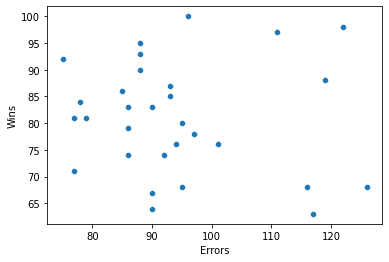

In [41]:
sns.scatterplot(x='Errors',y='Wins',data=df)
plt.show()

In [42]:
#Seprating my features and labels
X=df.drop(['Wins'],axis=1)
y=df['Wins']

In [43]:
#Scaling my features
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)

In [44]:
#Seprating my features and labels
X=df.drop(['Wins'], axis=1)
y=df['Wins']

In [45]:
#Splitting my train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=253)

Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train , y_train)
pred=lr.predict(X_test)

In [48]:
#metrics for my linear regression
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test, pred))
r2=r2_score(y_test, pred)

In [49]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 6.677972643250547
The r2-score is: 0.416597087598081


Decision Tree Regressor 

In [51]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor() 
DT.fit(X_train,y_train) 
y_pred1=DT.predict(X_test)  

In [52]:
#metrics for my decision tree
from sklearn.metrics import r2_score,roc_auc_score,mean_squared_error
rmse1=np.sqrt(mean_squared_error(y_test,y_pred1))
r2_1=r2_score(y_test,y_pred1)

In [53]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 7.496665925596525
The r2-score is: 0.26478283621140764


Random Forest Regressor 

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor() 
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test) 

In [55]:
#metrics for random forest
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2=np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2=r2_score(y_test, y_pred2)

In [56]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 6.0566806090465075
The r2-score is: 0.5201023024594456


Adaboost Regressor 

In [57]:
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor()
ab.fit(X_train,y_train) 
y_pred3=ab.predict(X_test) 

In [58]:
#metrics for my adaboost model
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse3=np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3=r2_score(y_test, y_pred3)

In [59]:
#printing my scores
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 5.257880989524203
The r2-score is: 0.6383397108843536


Bagging Regressor

In [60]:
from sklearn.ensemble import BaggingRegressor

bg=BaggingRegressor() #Instantiate the LogisticRegression object
bg.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred4=bg.predict(X_test) #Predict 

In [61]:
#metrics for my bagging model
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse4=np.sqrt(mean_squared_error(y_test,y_pred4))
r2_4=r2_score(y_test,y_pred4)

In [62]:
#score for my metrics to be printed
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 5.0588536250814755
The r2-score is: 0.6652014652014653


This dataset changes r2 score and root mean squared error score for my each run and i have decided not to use any hyperparameter tuning for the same as it will change my current accuracy which is best currently and the same has been saved in pkl file

Bagging Regressor is giving best metrics score. Saving bg model

In [67]:
#Saving the model in pkl file
import joblib
joblib.dump(bg,"Baseball_Prediction.pkl")

model=joblib.load("Baseball_Prediction.pkl")

#Predicting the saved model
prediction=model.predict(X_test)

#Converting the result into DataFrame
prediction=pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("Results_Baseball.csv",index=False)